# Analisis de datos (EDA)

Importamos las librerias necesarias para el desarrollo del analisis exploratorio.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos los datasets.

In [15]:
df_games = pd.read_parquet('games.parquet')
df_items = pd.read_parquet('items.parquet')
df_reviews = pd.read_parquet('Reviews.parquet')
df_generos = pd.read_parquet('generos.parquet')

Realizamos un .info de los datasets

In [16]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28817 entries, 0 to 28816
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         28817 non-null  object        
 1   release_date  28817 non-null  datetime64[ns]
 2   price         28817 non-null  float64       
 3   id            28817 non-null  object        
 4   developer     27593 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.1+ MB


Es un dataset con 28817 registros y 5 columnas. Tambien se puede ver que hay datos nulos en la columnas developer.

In [17]:
df_generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69540 entries, 0 to 69539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      69540 non-null  object
 1   genres  69540 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


Es un dataset con 69540 registros y 2 columnas. Tambien se puede ver que no hay datos nulos.

In [87]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   playtime_forever  int64 
dtypes: int64(1), object(2)
memory usage: 117.9+ MB


Es un dataset con 5153209 registros y 3 columnas.

In [19]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49186 entries, 0 to 49185
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    49186 non-null  object        
 1   posted     49186 non-null  datetime64[ns]
 2   item_id    49186 non-null  object        
 3   recommend  49186 non-null  bool          
 4   sentiment  49186 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 1.5+ MB


Es un dataset con49186 registros y 5 columnas. Tambien se puede ver que no hay datos nulos.

Revisamos cuantos datos nulos hay por columnas para cada dataset

In [20]:
df_games.isnull().sum()

title              0
release_date       0
price              0
id                 0
developer       1224
dtype: int64

In [21]:
df_generos.isnull().sum()

id        0
genres    0
dtype: int64

In [88]:
df_items.isnull().sum()

user_id             0
item_id             0
playtime_forever    0
dtype: int64

In [23]:
df_reviews.isnull().sum()

user_id      0
posted       0
item_id      0
recommend    0
sentiment    0
dtype: int64

Teniendo en cuenta que hay muy pocos datos se decide trabajar con los datos nulos existentes.

Revisamos si hay datos duplicados.

In [24]:
df_games[df_games.duplicated()]

,title,release_date,price,id,developer
13006,wolfenstein ii: the new colossus,2017-10-26,59.99,612880,machine games


In [25]:
df_generos[df_generos.duplicated()]

,id,genres
31745,612880,action


In [26]:
df_items[df_items.duplicated()]

,user_id,item_id,playtime_forever
164294,nikiad,20,5
164295,nikiad,50,0
164296,nikiad,70,0
164297,nikiad,130,0
164298,nikiad,220,198
...,...,...,...
4898223,76561198080057659,213670,725
4898224,76561198080057659,221910,53
4898225,76561198080057659,261030,253
4898226,76561198080057659,273110,0


In [27]:
df_reviews[df_reviews.duplicated()]

,user_id,posted,item_id,recommend,sentiment
867,bokkkbokkk,2015-09-24,346110,True,1
2271,imseriouss,2014-01-10,218620,True,2
2272,imseriouss,2014-01-10,105600,True,2
2273,imseriouss,2014-12-17,570,True,1
2274,imseriouss,2014-01-13,211820,True,2
...,...,...,...,...,...
35232,yolofaceguy,2014-09-02,261030,True,0
35454,76561198075591109,2013-12-26,242570,True,2
35825,76561198092022514,2014-08-17,261820,True,2
35826,76561198092022514,2014-02-17,224260,True,2


Se trabajara con estos datos ya que no son duplicados

Procedemos a cambiar el tipo de datos para su posterior analisis.

In [29]:
df_games['title'] = df_games['title'].astype(str)
df_games['id'] =df_games['id'].astype(str)
df_games['developer'] =df_games['developer'].astype(str)

In [30]:
df_generos['id'] =df_generos['id'].astype(str)
df_generos['genres'] =df_generos['genres'].astype(str)

In [32]:
df_items['item_id'] =df_items['item_id'].astype(str)
df_items['user_id'] =df_items['user_id'].astype(str)

In [34]:
df_reviews['item_id'] =df_reviews['item_id'].astype(str)
df_reviews['user_id'] =df_reviews['user_id'].astype(str)

Ahora hacemos un describe de las columas con tipo de dato object ya que en este dataframe no hay variables numericas.

In [35]:
df_games.describe(include=object)

,title,id,developer
count,28817,28817,28817
unique,28780,28816,10572
top,soundtrack,612880,ubisoft - san francisco
freq,3,2,1258


Vemos que el dataframe de games hay un total de 10572 developer diferentes siendo ubisoft - san francisco el que mas juegos desarrolla. Ademas hay un total de 28780 juegos diferentes

In [36]:
df_generos.describe(include=object)

,id,genres
count,69540,69540
unique,28816,23
top,708940,indie
freq,10,15135


Vemos que en el dataset de generos hay un total de 23 generos unicos, donde indie es el que se repie mas

In [37]:
df_items.describe(include=object)

,user_id,item_id
count,5153209,5153209
unique,70912,10978
top,phrostb,205790
freq,7762,49571


In [38]:
df_reviews.describe(include=object)

,user_id,item_id
count,49186,49186
unique,22795,2897
top,officialsenix,440
freq,20,3436


Hacemos un dataset general con las columnas de todos los datasets base para analizar 

In [63]:
df_general = pd.merge(df_games, df_reviews, left_on='id', right_on='item_id')
df_general = df_general[['title', 'release_date', 'price', 'id', 'developer', 'posted', 'sentiment']]
df_general['release_date'] = df_general['release_date'].astype(str)
df_general['year_release'] = df_general['release_date'].str.split('-').str[0].astype(int)
df_general['posted'] = df_general['posted'].astype(str)
df_general['year_posted'] = df_general['posted'].str.split('-').str[0].astype(int)
df_general = df_general[['title', 'year_release', 'price', 'id', 'developer', 'year_posted']]
df_general.head(5)

,title,year_release,price,id,developer,year_posted
0,half-life,1998,9.99,70,valve,2015
1,half-life,1998,9.99,70,valve,2011
2,half-life,1998,9.99,70,valve,2014
3,half-life,1998,9.99,70,valve,2013
4,half-life,1998,9.99,70,valve,2013


Exportamos el archivo para trabajarlo

In [84]:
df_general.to_excel('general.xlsx')

Ahora importamos autoviz la cual es una libreria que nos da una serie de graficos a partir de un dataset

In [76]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

Shape of your Data Set loaded: (41222, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    7 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,41221.000000,Possible ID colum: drop before modeling process.
title,object,0.000000,5,nan,nan,"2384 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 2394 unique values: Use hash encoding or embedding to reduce dimension."
year_release,int64,0.000000,0,1989.000000,2017.000000,has 548 outliers greater than upper bound (2020.00) or lower than lower bound(2004.00). Cap them or remove them.
price,float64,0.000000,NA,0.000000,771.710000,has 794 outliers greater than upper bound (49.97) or lower than lower bound(-29.98). Cap them or remove them.
id,int64,0.000000,5,10.000000,428880.000000,No issue
developer,object,0.000000,3,nan,nan,"1631 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 1640 unique values: Use hash encoding or embedding to reduce dimension."
year_posted,int64,0.000000,0,2010.000000,2015.000000,has 1565 outliers greater than upper bound (2016.50) or lower than lower bound(2012.50). Cap them or remove them.


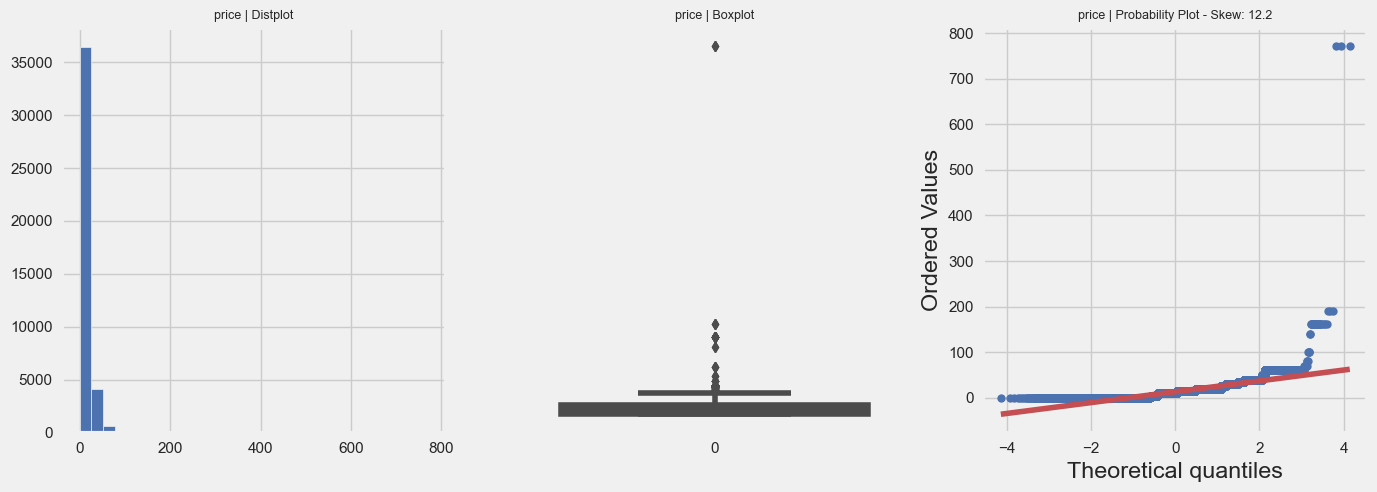

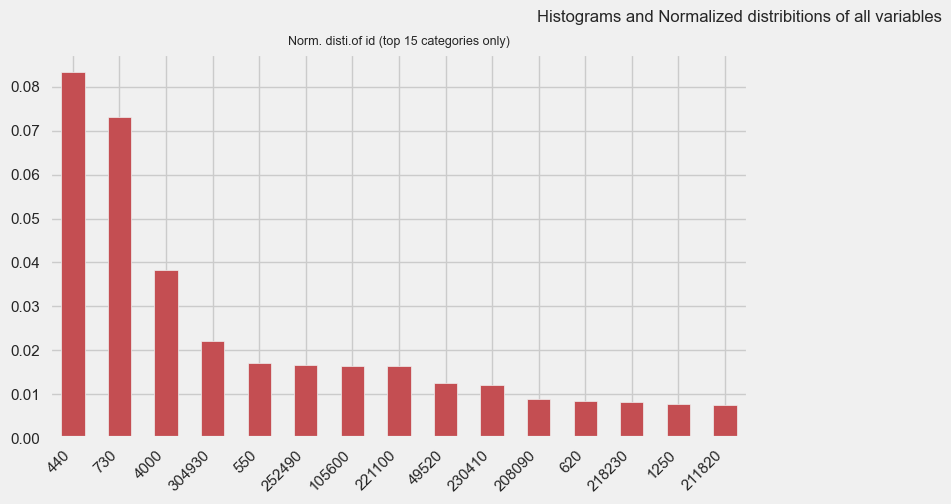

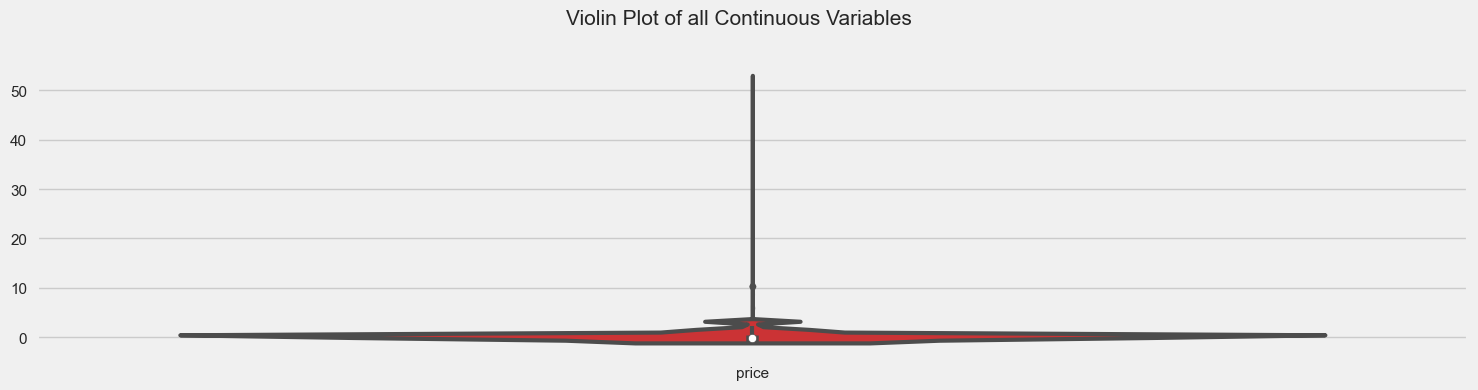

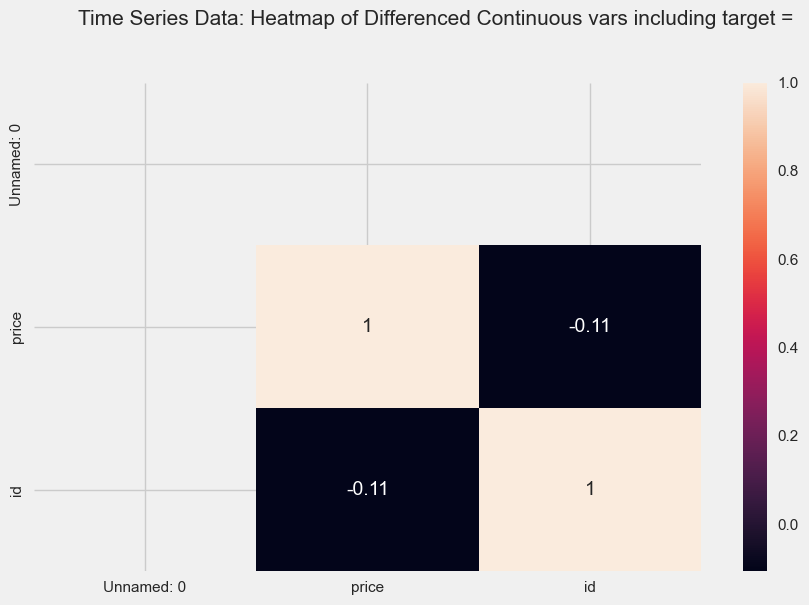

<Figure size 1500x0 with 0 Axes>

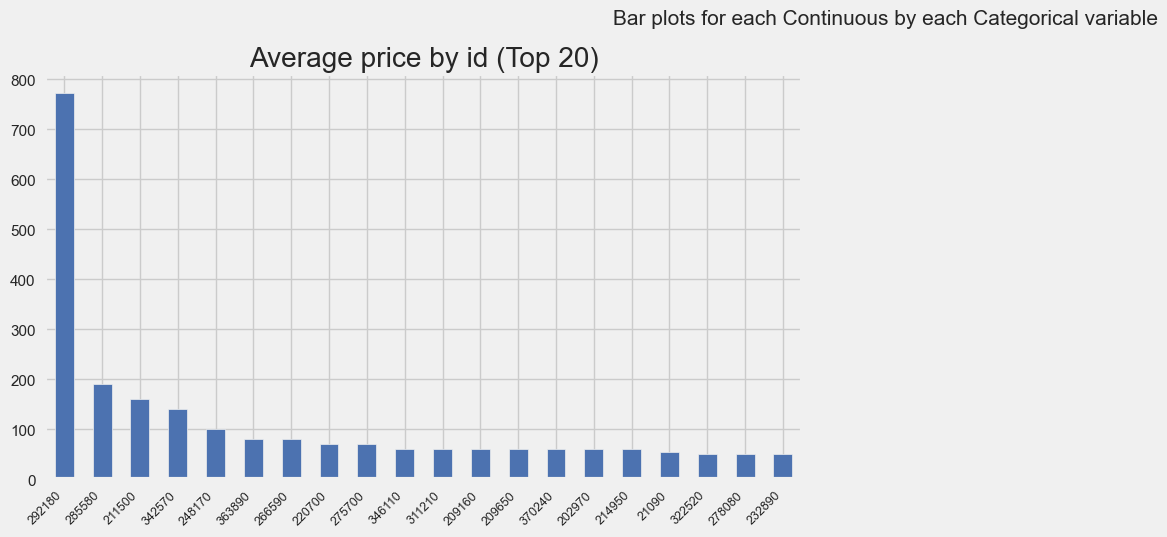

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Vaylen\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Vaylen\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Vaylen\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Vaylen\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Vaylen\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

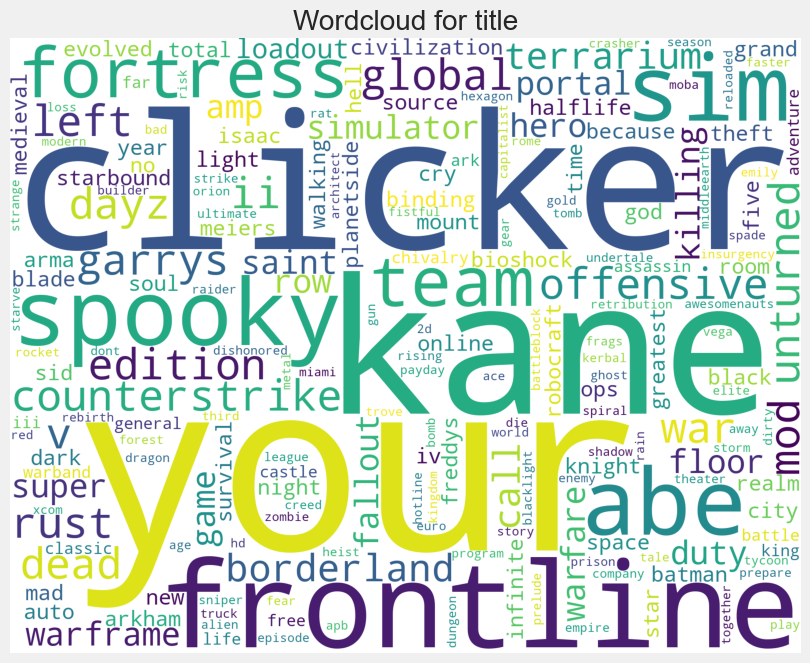

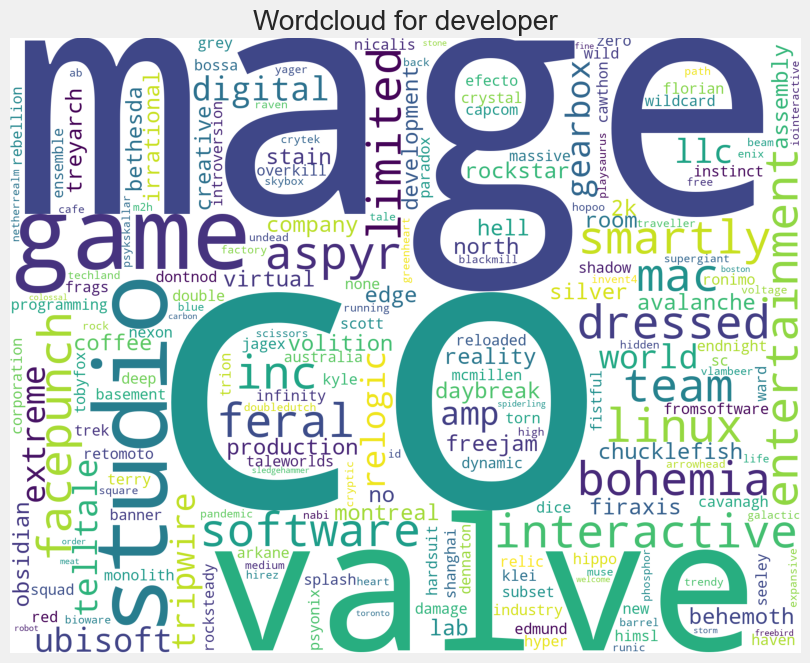

All Plots done
Time to run AutoViz = 71 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [85]:
AV = AutoViz_Class()
report = AV.AutoViz('general.xlsx')

**Conclusiones de graficos del dataset general**
- Vemos que el precio de la mayoria de los juegos estan entre 0 y 69,9 aprox.
- Los precios para el id 292180 son los mas altos en promedio


# ML

Ahora se realizara un modelo de machine learning para armar un sistema de recomendación. Para esto se van a utilizar el algoritmo de similitud del coseno, porque éste proporciona recomendaciones basadas en la similitud entre elementos, por lo tanto es el ideal para nuestro propósito.

El sistema de recomendación se basa en que ingresando el id de producto se recibe una lista con 5 juegos recomendados similares al ingresado.

Primero importamos las librerias necesarias

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Importamos los datasasets

In [3]:
df_games = pd.read_parquet('games.parquet')
df_items = pd.read_parquet('items.parquet')
df_reviews = pd.read_parquet('Reviews.parquet')
df_generos = pd.read_parquet('generos.parquet')

Hacemos un join del dataset df_games y df_generos que son necesarios para la creacion del modelo

In [4]:
df_steam = pd.merge(df_games, df_generos, left_on='id', right_on='id')
df_steam.head(2)

,title,release_date,price,id,developer,genres
0,lost summoner kitty,2018-01-04,4.99,761140,kotoshiro,action
1,lost summoner kitty,2018-01-04,4.99,761140,kotoshiro,casual


Filtramos el dataset con solo las columnas que se van a utilizar y asi optimizar el funcionamiento del modelo

In [5]:
df_steam = df_steam[['id', 'title', 'genres']]
df_steam.head(2)

,id,title,genres
0,761140,lost summoner kitty,action
1,761140,lost summoner kitty,casual


Borramos resgistros duplicados

In [6]:
df_steam = df_steam.drop_duplicates()
df_steam.head(2)

,id,title,genres
0,761140,lost summoner kitty,action
1,761140,lost summoner kitty,casual


Primero agrupamos el dataset para posteriormente crear una matriz TF-IDF necesaria para calcular la similitud de coseno

In [10]:
# Agrupa los géneros y títulos para cada juego en una lista
grouped_genres_title = df_steam.groupby('id')[['genres', 'title']].agg(list).reset_index()

# Crea una nueva columna que contiene la lista de géneros como texto
grouped_genres_title['genres_text'] = grouped_genres_title['genres'].apply(lambda x: ' '.join(x))

# Crea una matriz TF-IDF para los géneros de los juegos
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Cambia 500 al número deseado de características
tfidf_matrix = tfidf_vectorizer.fit_transform(grouped_genres_title['genres_text'])

# Calcula la similitud del coseno entre los juegos
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

guardamos el dataframe obtenido en df

In [11]:
df=grouped_genres_title

Creamos la funcion de recomendacion_juego solicitada

In [12]:
# Función para obtener recomendaciones
def recomendacion_juego(id):
    if id not in df['id'].values:
        no_encontrado = f'El id {id} no fue encontrado en la base de datos'
        return no_encontrado
    
    else:
        # Encuentra el índice del juego con el ID dado
        idx = df[df['id'] == id].index[0]

        # Obtén las puntuaciones de similitud del coseno para todos los juegos
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordena los juegos en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtén los índices de los juegos más similares (excluyendo el juego de entrada)
        sim_scores = sim_scores[1:6]  # Cambia esto si quieres más o menos recomendaciones

        # Obtiene los títulos de los juegos recomendados
        game_indices = [i[0] for i in sim_scores]
        recommended_game_titles = df.iloc[game_indices]['title']

        # Convierte la lista de títulos en una lista plana y única
        recommended_game_titles_flat = list(set([title for sublist in recommended_game_titles for title in sublist]))

        return recommended_game_titles_flat

In [13]:
recomendacion_juego('772540')

['enforcer: police crime action',
 'thehunter: primal',
 'beyond space remastered edition',
 'the tomorrow war',
 'star trek™ : 25th anniversary']

## Funcion Endpoint

Debido a que la matriz de similitud de coseno s muy pesada se considera hacer todo el proceso de calcular la matriz TF-IDF y la similitud de coseno dentro de la funcion

In [7]:
# Agrupa los géneros y títulos para cada juego en una lista
grouped_genres_title = df_steam.groupby('id')[['genres', 'title']].agg(list).reset_index()

# Crea una nueva columna que contiene la lista de géneros como texto
grouped_genres_title['genres_text'] = grouped_genres_title['genres'].apply(lambda x: ' '.join(x))


In [8]:
# Función para obtener recomendaciones de juego
def recomendacion_juego(id):
    if id not in df['id'].values:
        no_encontrado = f'El id {id} no fue encontrado en la base de datos'
        return no_encontrado
    
    else:
        # Crea una matriz TF-IDF para los géneros de los juegos
        tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Cambia 500 al número deseado de características
        tfidf_matrix = tfidf_vectorizer.fit_transform(grouped_genres_title['genres_text'])
        
        # Calcula la similitud del coseno entre los juegos bajo demanda
        cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

        # Encuentra el índice del juego con el ID dado
        idx = df[df['id'] == id].index[0]

        # Obtén las puntuaciones de similitud del coseno para todos los juegos
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordena los juegos en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtén los índices de los juegos más similares (excluyendo el juego de entrada)
        sim_scores = sim_scores[1:6]  # Cambia esto si quieres más o menos recomendaciones

        # Obtiene los títulos de los juegos recomendados
        game_indices = [i[0] for i in sim_scores]
        recommended_game_titles = df.iloc[game_indices]['title']

        # Convierte la lista de títulos en una lista plana y única
        recommended_game_titles_flat = list(set([title for sublist in recommended_game_titles for title in sublist]))

        return recommended_game_titles_flat

Exportamos los archivos necesarios para el endpoint

In [10]:
df.to_parquet('Recomendacion.parquet', index = False)